# Name: Hanan Fared Mohamed Omara , ID =  20398559

---
<h1><font color = blue>Question 1</font></h1>

---

Our goal is to cluster users based on their spending behaviors.
1. Your task is to perform a clustering analysis leveraging` the K-means`method and report your findings.
2. You should specify how you select the right ”K” for the k-means method, and how you create features.
3. Explain the resultant clusters (the meaning of each cluster) and judge the quality of resultant clusters.

## First try

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=14), k=(2, 15))

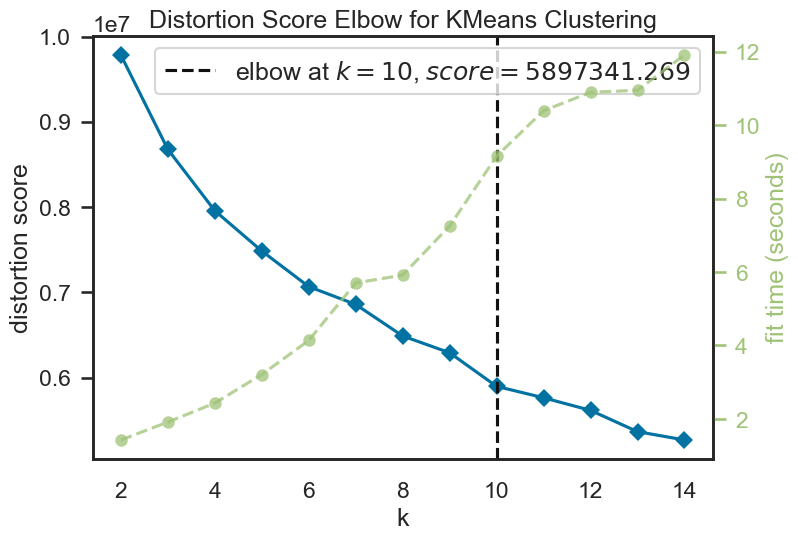

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 15))

visualizer.fit(feat_scaled)
visualizer.show()

No. Clusters: 2, Silhouette Score: 0.177, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.177, Change from Previous Cluster: 0.0
No. Clusters: 4, Silhouette Score: 0.186, Change from Previous Cluster: 0.009
No. Clusters: 5, Silhouette Score: 0.171, Change from Previous Cluster: -0.015
No. Clusters: 6, Silhouette Score: 0.175, Change from Previous Cluster: 0.004
No. Clusters: 7, Silhouette Score: 0.175, Change from Previous Cluster: 0.0
No. Clusters: 8, Silhouette Score: 0.161, Change from Previous Cluster: -0.014
No. Clusters: 9, Silhouette Score: 0.143, Change from Previous Cluster: -0.018
No. Clusters: 10, Silhouette Score: 0.125, Change from Previous Cluster: -0.018
No. Clusters: 11, Silhouette Score: 0.136, Change from Previous Cluster: 0.011
No. Clusters: 12, Silhouette Score: 0.132, Change from Previous Cluster: -0.004
No. Clusters: 13, Silhouette Score: 0.133, Change from Previous Cluster: 0.001
No. Clusters: 14, Silhouette Score: 0.136, Change from Previo

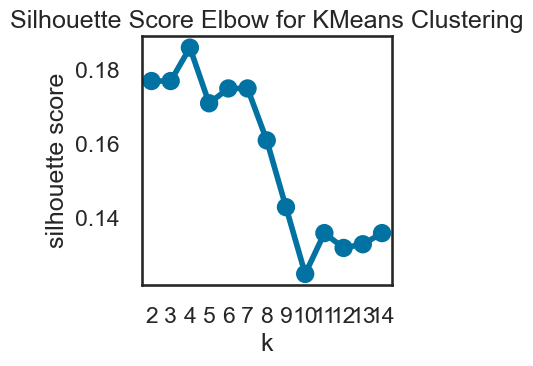

In [ ]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(34
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(feat_scaled, 2, 15)

In [ ]:
#refit the model with the optimal number of cluster
# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=7)

# Fit the KMeans model to the data
kmeans.fit(feat_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the centroids of each cluster
centroids = kmeans.cluster_centers_
labels

KMeans(n_clusters=7)

array([3, 3, 3, ..., 2, 2, 2])

In [ ]:
labels.shape

(430287,)

In [ ]:
feat_scaled

array([[-2.8370109 ,  0.95468345,  1.9922606 , ...,  0.48798349,
        -1.48846508, -0.83014611],
       [-2.99334961,  1.55978048,  1.85171044, ...,  0.72453159,
        -1.5711817 , -0.07599527],
       [-2.84946302,  1.30539309,  1.90939018, ...,  0.80265121,
        -1.56127653, -0.25431806],
       ...,
       [-0.70373744, -0.86614479,  0.15925779, ..., -0.19355015,
        -0.01240324, -0.42698846],
       [-0.67551598, -1.71941644,  0.35926653, ..., -0.41579567,
         0.07645768, -1.2840415 ],
       [-0.71490404, -0.86101677,  0.15698303, ..., -0.20312828,
        -0.01218502, -0.43092804]])

In [ ]:
from sklearn.manifold import TSNE

tsne_1 = TSNE(n_components=2, random_state=42)
X_tsne_1 = tsne_1.fit_transform(array)
tsne_1.kl_divergence_

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
fig = px.scatter(x=X_tsne_1[:, 0], y=X_tsne_1[:, 1],color=labels)
fig.update_layout(
    title="t-SNE plot of clustered data",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE")
fig.show()

## second try

In [ ]:
dropped=['merchant_group_id','merchant_category_id_x','subsector_id','merchant_category_id_y'
         ,'feature_1','feature_2','feature_3','category_4','first_active_month']
total_data.drop(dropped, axis=1, inplace=True)

In [ ]:
# Randomly sample 100,00 rows from the dataset
NEW_data = total_data.sample(n=10000, random_state=42)

In [ ]:
NEW_data

,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag12,active_months_lag12,city_id_x,state_id,category_2,purchase_date,purchase_amount,month_lag,authorized_flag,city_id_y
383500,-0.038,5,5,5,1.000,1.020,3,0.940,12,-1,-1,1.000,69,-0.618,-5.145,5,-1
180638,0.121,1,2,2,1.010,1.075,3,0.860,12,271,9,1.000,5,-0.544,1.400,5,271
20035,-0.057,5,1,1,6.930,12.705,3,8.570,7,-1,-1,1.000,6,-0.542,1.833,5,212
297562,-0.057,1,4,4,1.020,1.007,3,1.020,12,69,9,1.000,73,-0.642,-1.945,5,69
26283,-0.057,5,1,1,6.930,12.705,3,8.570,7,-1,-1,1.000,22,-0.430,1.364,5,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101672,-0.057,5,5,5,0.930,0.949,3,0.760,12,-1,-1,1.000,6,-0.704,1.667,5,140
80769,-0.057,5,5,5,0.930,0.949,3,0.760,12,-1,-1,1.000,6,-0.718,1.500,5,69
173000,-0.048,1,2,2,0.820,0.900,3,0.900,12,81,24,2.000,2,-0.688,1.500,5,81
137020,-0.048,1,2,1,0.730,0.830,3,0.730,12,347,20,5.000,6,-0.474,1.500,5,347


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=20), k=(2, 21))

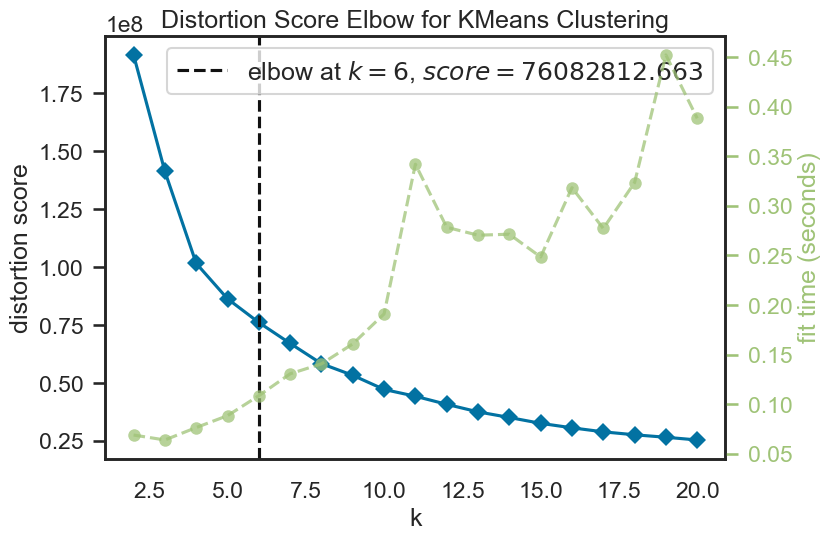

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# This approaches uses distortion score to evaluate KMeans
new_model = KMeans()
visualizer = KElbowVisualizer(new_model, k=(2, 21))

visualizer.fit(NEW_data)
visualizer.show()

No. Clusters: 2, Silhouette Score: 0.413, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.47, Change from Previous Cluster: 0.057
No. Clusters: 4, Silhouette Score: 0.501, Change from Previous Cluster: 0.031
No. Clusters: 5, Silhouette Score: 0.472, Change from Previous Cluster: -0.029
No. Clusters: 6, Silhouette Score: 0.474, Change from Previous Cluster: 0.002
No. Clusters: 7, Silhouette Score: 0.42, Change from Previous Cluster: -0.054
No. Clusters: 8, Silhouette Score: 0.423, Change from Previous Cluster: 0.003
No. Clusters: 9, Silhouette Score: 0.41, Change from Previous Cluster: -0.013


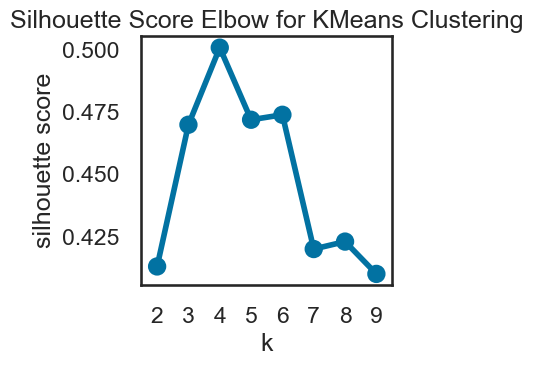

In [ ]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(NEW_data, 2, 10)

In [ ]:
#refit the model with the optimal number of cluster
# Create a KMeans object with the desired number of clusters
kmeans_model = KMeans(n_clusters=4)

# Fit the KMeans model to the data
kmeans_model.fit(NEW_data)

# Predict the cluster of each row
labels_2 = kmeans_model.predict(NEW_data)

# Get the centroids of each cluster
centroids = kmeans_model.cluster_centers_
labels_2

KMeans(n_clusters=4)

array([0, 1, 2, ..., 0, 1, 0])

In [ ]:
centroids

array([[  3.35508581,   2.78809869,   3.45899855,   3.46716255,
          2.07008708,   2.97710548,   2.99963716,   3.64808237,
         11.20192308,  21.95391872,   5.98584906,   1.6030479 ,
         30.93359942,  -0.52449332,  -0.9692085 ,   4.95718433,
         57.75126996],
       [  1.39873718,   1.        ,   3.11154684,   3.20217865,
          1.08685839,   1.14650778,   3.        ,   1.19817429,
         11.91067538, 216.97254902,  11.86143791,   2.38736383,
         35.55076253,  -0.55296632,  -0.98201328,   4.98257081,
        203.41220044],
       [  3.00240362,   3.01102266,   3.29332517,   3.25290876,
          2.36508267,   3.76160266,   3.        ,   4.64085119,
         10.99938763,   0.92529088,   6.10655236,   1.79730557,
         32.87630129,  -0.55290458,  -1.0056363 ,   4.97550521,
        277.19657073],
       [  7.57378336,   1.85714286,   3.68928571,   3.84285714,
          1.39182143,   1.74938549,   3.        ,   1.93225   ,
         11.68928571,  76.38571429,

In [ ]:
array_1 = NEW_data.to_numpy()

print(array_1)

[[-3.76408400e-02  5.00000000e+00  5.00000000e+00 ... -5.14492754e+00
   5.00000000e+00 -1.00000000e+00]
 [ 1.20997630e-01  1.00000000e+00  2.00000000e+00 ...  1.40000000e+00
   5.00000000e+00  2.71000000e+02]
 [-5.74706500e-02  5.00000000e+00  1.00000000e+00 ...  1.83333333e+00
   5.00000000e+00  2.12000000e+02]
 ...
 [-4.75557500e-02  1.00000000e+00  2.00000000e+00 ...  1.50000000e+00
   5.00000000e+00  8.10000000e+01]
 [-4.75557500e-02  1.00000000e+00  2.00000000e+00 ...  1.50000000e+00
   5.00000000e+00  3.47000000e+02]
 [-4.75557500e-02  1.00000000e+00  3.00000000e+00 ... -8.29411765e+00
   5.00000000e+00  8.80000000e+01]]


In [ ]:
array_1


array([[-3.76408400e-02,  5.00000000e+00,  5.00000000e+00, ...,
        -5.14492754e+00,  5.00000000e+00, -1.00000000e+00],
       [ 1.20997630e-01,  1.00000000e+00,  2.00000000e+00, ...,
         1.40000000e+00,  5.00000000e+00,  2.71000000e+02],
       [-5.74706500e-02,  5.00000000e+00,  1.00000000e+00, ...,
         1.83333333e+00,  5.00000000e+00,  2.12000000e+02],
       ...,
       [-4.75557500e-02,  1.00000000e+00,  2.00000000e+00, ...,
         1.50000000e+00,  5.00000000e+00,  8.10000000e+01],
       [-4.75557500e-02,  1.00000000e+00,  2.00000000e+00, ...,
         1.50000000e+00,  5.00000000e+00,  3.47000000e+02],
       [-4.75557500e-02,  1.00000000e+00,  3.00000000e+00, ...,
        -8.29411765e+00,  5.00000000e+00,  8.80000000e+01]])

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
r = tsne.fit_transform(array_1)
tsne.kl_divergence_

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



0.6448079943656921

In [6]:
# fig = px.scatter(x=r[:, 0], y=r[:, 1],color=labels_2)
# fig.update_layout(
#     title="t-SNE visualization of Custom Classification dataset",
#     xaxis_title="First t-SNE",
#     yaxis_title="Second t-SNE",
# )
# fig.show()

<AxesSubplot:>

Text(0.5, 1.0, 'K-means Clustering')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature\xa02')

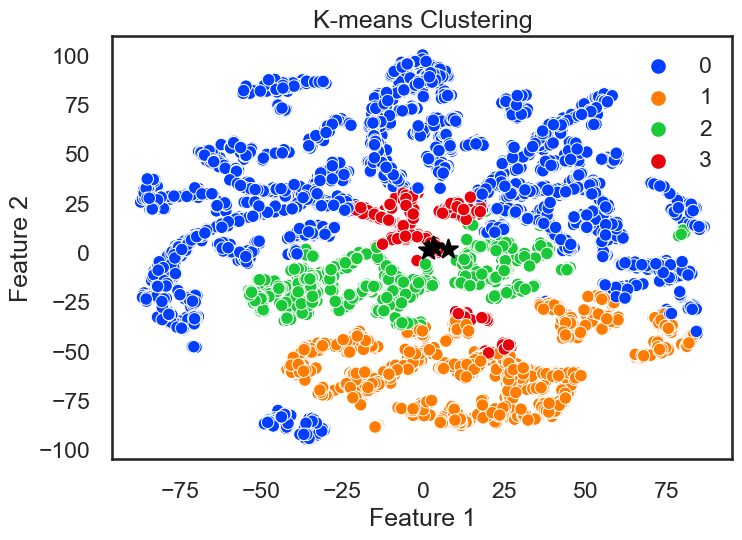

In [ ]:
# Visualize the clusters
sns.scatterplot(x=r[:,0], y=r[:,1], hue=kmeans_model.labels_, palette='bright')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], marker='*', s=200, c='black')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

> Using another number of clusters as now will use the number of clusters =6

In [ ]:
#refit the model with the optimal number of cluster
# Create a KMeans object with the desired number of clusters
kmeans_3 = KMeans(n_clusters=6)

# Fit the KMeans model to the data
kmeans_3.fit(NEW_data)

# Predict the cluster of each row
labels_3 = kmeans_3.predict(NEW_data)

# Get the centroids of each cluster
centroids_3 = kmeans_3.cluster_centers_
labels_3

KMeans(n_clusters=6)

array([2, 4, 3, ..., 2, 4, 2])

In [5]:
# fig = px.scatter(x=r[:, 0], y=r[:, 1],color=labels_3)
# fig.update_layout(
#     title="t-SNE visualization of Custom Classification dataset",
#     xaxis_title="First t-SNE",
#     yaxis_title="Second t-SNE",
# )
# fig.show()

---
<h1><font color = blue>Question 2</font></h1>

---

Based on your results from Q1, report the statistics of loyalty
scores for each cluster of users. Report your findings.

> I will apply statistical on `first try` because this try I use all data , But when I try to use second try and I got a null data on  resulting dataframe as I took these samplying random.

In [ ]:
labels= pd.DataFrame(labels,columns=['clusters'])

In [ ]:
labels= pd.DataFrame(labels,columns=['clusters'])
score_col.shape
labels.shape
df1 = pd.concat([score_col, labels], axis=1)
statistical_report = df1.groupby('score')['score'].agg(['sum', 'mean', 'max', 'min', 'std'])


In [ ]:
score_col.shape
labels.shape

(430287,)

(430287, 1)

In [ ]:
# first i will concat the labels from cluster with score columns
# Concatenate the DataFrames
df1 = pd.concat([score_col, labels], axis=1)

In [ ]:
df1

,score,clusters
0,4.806,0
1,0.779,0
2,5.708,0
3,-0.457,0
4,1.540,0
...,...,...
430282,0.699,2
430283,2.293,0
430284,-1.891,0
430285,0.000,2


In [ ]:
statistical_report_1 = df1.groupby('clusters')['score'].agg(['sum', 'mean', 'max', 'min', 'std'])

In [ ]:
statistical_report_1

,sum,mean,max,min,std
clusters,,,,,
0,-78584.147,-0.536,15.295,-33.219,3.945
1,-60401.446,-0.376,17.965,-33.219,3.418
2,-42408.271,-0.345,15.994,-33.219,3.614
3,-2.620,-0.238,2.024,-3.432,1.518


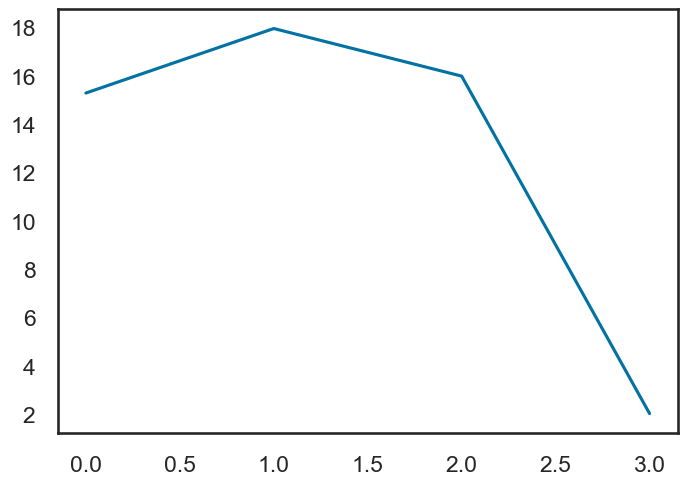

In [ ]:
# plt.plot(statistical_report['sum'])
# plt.plot(statistical_report['mean'])
plt.plot(statistical_report_1['max'])
# plt.plot(statistical_report['min'])
# plt.plot(statistical_report['std'])
# plt.show

---
<h1><font color = blue>Question 3</font></h1>

---

Discuss whether you need to reduce the dimensions to
improve clustering performance and build another clustering model (if
you believe dimension reduction would help, you can apply it or choose
another clustering method) to improve your analysis from Q1. You should
explain why the resultant clusters are better than the ones you got in Q1.

> Here I will apply `PCA` to reduce dimensions to improve cluster more and then I will build another model

In [ ]:
from sklearn.decomposition import PCA

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'PCA plot of aggregated data')

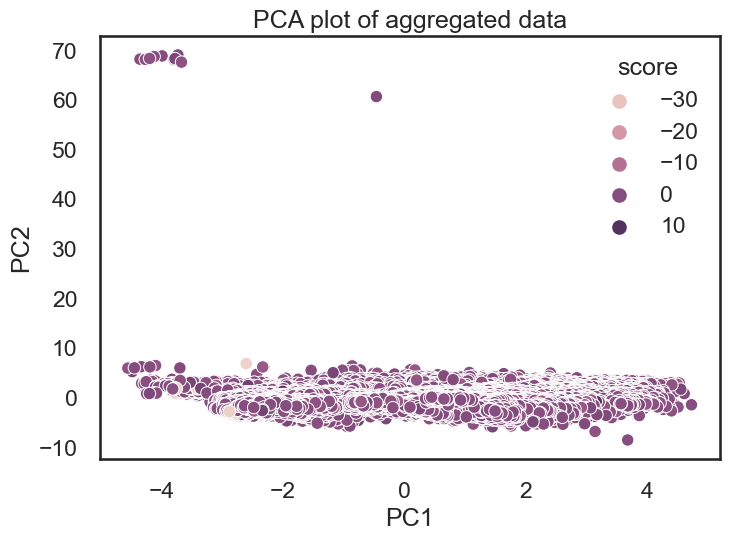

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(feat_scaled)

# Create a new DataFrame with the PCA results
columns = ['PC{}'.format(i+1) for i in range(pca.n_components_)]
pca_df = pd.DataFrame(X_pca, columns=columns)
pca_df['score']=score_col

# Plot the results
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='score',data=pca_df)
plt.title('PCA plot of aggregated data')
plt.show()

In [ ]:
feat_scaled.shape

(430287, 20)

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=20), k=(2, 21))

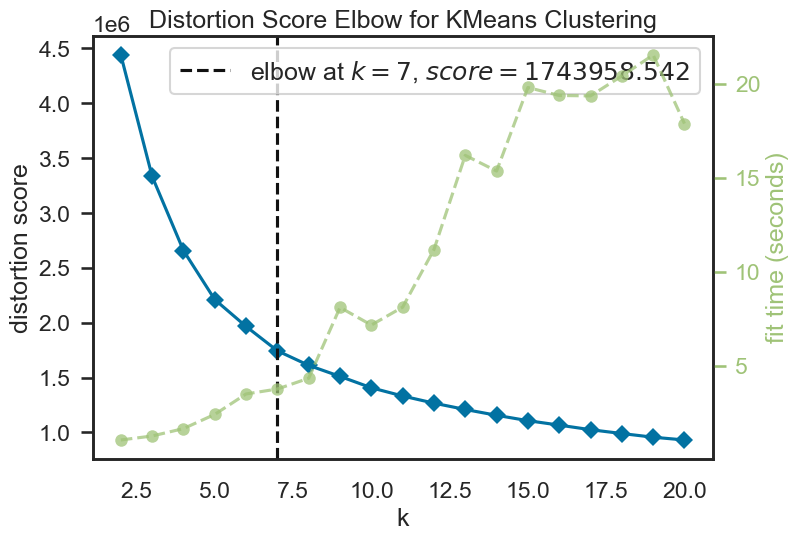

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model_pca_1= KMeans()
visualizer = KElbowVisualizer(model_pca_1, k=(2, 21))

visualizer.fit(X_pca)
visualizer.show()

No. Clusters: 2, Silhouette Score: 0.316, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.316, Change from Previous Cluster: 0.0
No. Clusters: 4, Silhouette Score: 0.338, Change from Previous Cluster: 0.022
No. Clusters: 5, Silhouette Score: 0.305, Change from Previous Cluster: -0.033
No. Clusters: 6, Silhouette Score: 0.309, Change from Previous Cluster: 0.004
No. Clusters: 7, Silhouette Score: 0.3, Change from Previous Cluster: -0.009
No. Clusters: 8, Silhouette Score: 0.272, Change from Previous Cluster: -0.028
No. Clusters: 9, Silhouette Score: 0.264, Change from Previous Cluster: -0.008


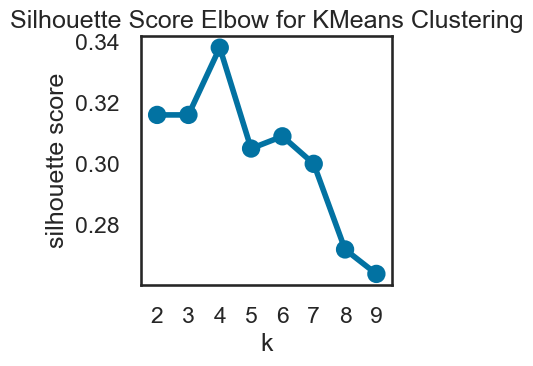

In [ ]:
#Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(X_pca, 2, 10)

In [ ]:
#refit the model with the optimal number of cluster
# Create a KMeans object with the desired number of clusters
model_pca_refit = KMeans(n_clusters=4)

# Fit the KMeans model to the data
model_pca_refit.fit(X_pca)

# Predict the cluster of each row
labels_pca= model_pca_refit.predict(X_pca)

# Get the centroids of each cluster
centroids_pca = model_pca_refit.cluster_centers_
labels_pca

KMeans(n_clusters=4)

array([3, 3, 3, ..., 0, 0, 0])

In [ ]:
#refit the model with the optimal number of cluster
# Create a KMeans object with the desired number of clusters
model_pca_refit_7 = KMeans(n_clusters=7)

# Fit the KMeans model to the data
model_pca_refit_7.fit(X_pca)

# Predict the cluster of each row
labels_pca_7= model_pca_refit_7.predict(X_pca)

# Get the centroids of each cluster
centroids_pca_7 = model_pca_refit.cluster_centers_
labels_pca_7

KMeans(n_clusters=7)

array([4, 4, 4, ..., 2, 2, 2])

In [ ]:
X_pca

array([[-2.83710111,  0.95413777,  1.99308076,  1.3101703 , -2.19350243,
         0.03135367],
       [-2.99368864,  1.55995454,  1.85257865,  0.33871916, -1.44166511,
        -0.60102726],
       [-2.84962365,  1.30525298,  1.91006858,  0.94239486, -1.7287123 ,
        -0.36076072],
       ...,
       [-0.70377557, -0.86622077,  0.15941957, -0.47823905,  1.8421918 ,
        -0.86918309],
       [-0.67525561, -1.72030131,  0.35934897,  0.17373405, -1.30527183,
         0.23343469],
       [-0.71490295, -0.86115603,  0.15709922, -0.50651144,  1.85284541,
        -0.94946657]])

In [ ]:
from sklearn.manifold import TSNE

tsne_1 = TSNE(n_components=2, random_state=42)
pca = tsne_1.fit_transform(X_pca)
tsne_1.kl_divergence_

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



4.892394542694092

<AxesSubplot:>

Text(0.5, 1.0, 'K-means Clustering')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature\xa02')

C:\Users\Lap-5\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



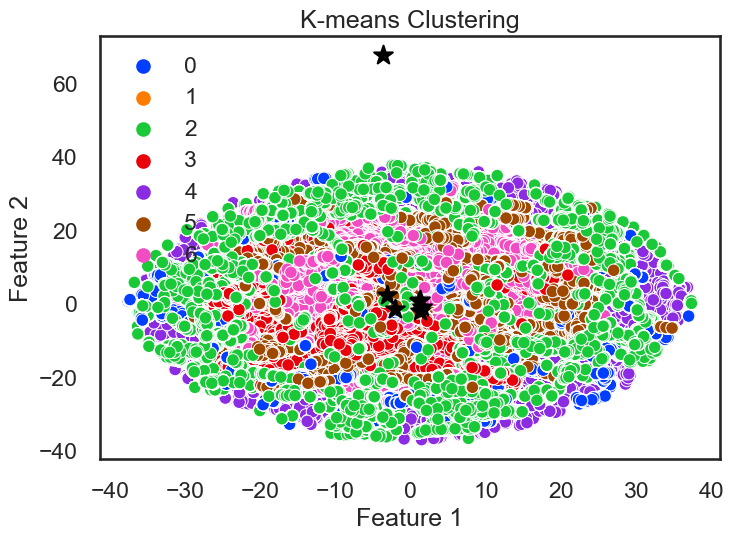

In [ ]:
# Visualize the clusters
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=model_pca_refit_7.labels_, palette='bright')
plt.scatter(model_pca_refit.cluster_centers_[:,0], model_pca_refit.cluster_centers_[:,1], marker='*', s=200, c='black')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
# fig = px.scatter(x=pca[:, 0], y=pca[:, 1],color=labels_pca_7)
# fig.update_layout(
#     title="t-SNE visualization of Custom Classification dataset",
#     xaxis_title="First t-SNE",
#     yaxis_title="Second t-SNE",
# )
# fig.show()

<AxesSubplot:>

Text(0.5, 1.0, 'K-means Clustering')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature\xa02')

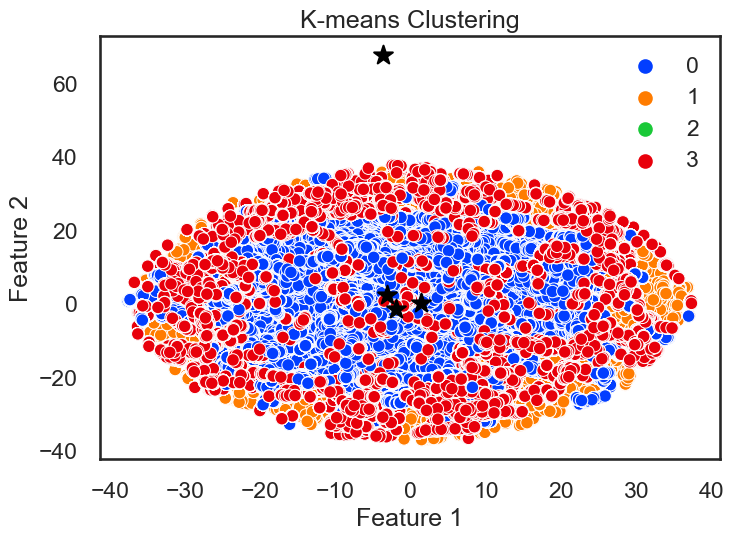

In [ ]:
# Visualize the clusters
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=model_pca_refit.labels_, palette='bright')
plt.scatter(model_pca_refit.cluster_centers_[:,0], model_pca_refit.cluster_centers_[:,1], marker='*', s=200, c='black')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
# fig = px.scatter(x=pca[:, 0], y=pca[:, 1],color=labels_pca_1)
# fig.update_layout(
#     title="t-SNE visualization of Custom Classification dataset",
#     xaxis_title="First t-SNE",
#     yaxis_title="Second t-SNE",
# )
# fig.show()

## Second try with applying PCA on the sample of data

> Apply PCA To reduce dimension on the second try which contain a smaple of data.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'PCA plot of aggregated data')

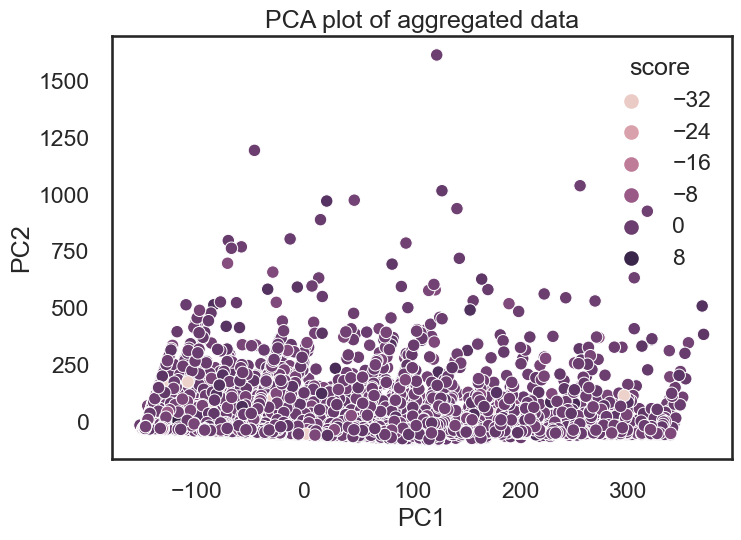

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca_2 = PCA(n_components=0.95, random_state=42)
X_pca_new = pca_2.fit_transform(NEW_data)

# Create a new DataFrame with the PCA results
columns = ['PC{}'.format(i+1) for i in range(pca.n_components_)]
pca_df_new = pd.DataFrame(X_pca_new, columns=columns)
pca_df_new['score']=score_col

# Plot the results
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='score',data=pca_df_new)
plt.title('PCA plot of aggregated data')
plt.show()

In [ ]:
X_pca_new

array([[-143.59287362,   33.82507545,   22.95674249,   -3.2256038 ],
       [ 232.85730037,  -48.77913903,   83.15705146,    1.08636372],
       [  19.64651854,  -58.66511034,  -96.18091747,    6.33683667],
       ...,
       [ -32.94697436,  -38.13035564,   48.40254967,   -2.26441062],
       [ 339.51667452,  -53.14108495,   97.47899444,    1.99046449],
       [ -22.26914907,  -23.69141547,   47.36845033,   -1.885958  ]])

In [ ]:
pca_df_new


,PC1,PC2,PC3,PC4,score
0,-143.593,33.825,22.957,-3.226,4.806
1,232.857,-48.779,83.157,1.086,0.779
2,19.647,-58.665,-96.181,6.337,5.708
3,-45.134,32.796,35.741,-2.109,-0.457
4,-91.862,-22.665,-12.675,7.117,1.540
...,...,...,...,...,...
9995,-36.913,-48.403,-52.660,-4.208,-0.433
9996,-92.827,-38.372,-10.073,-3.823,-1.365
9997,-32.947,-38.130,48.403,-2.264,0.279
9998,339.517,-53.141,97.479,1.990,-3.320


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=20), k=(2, 21))

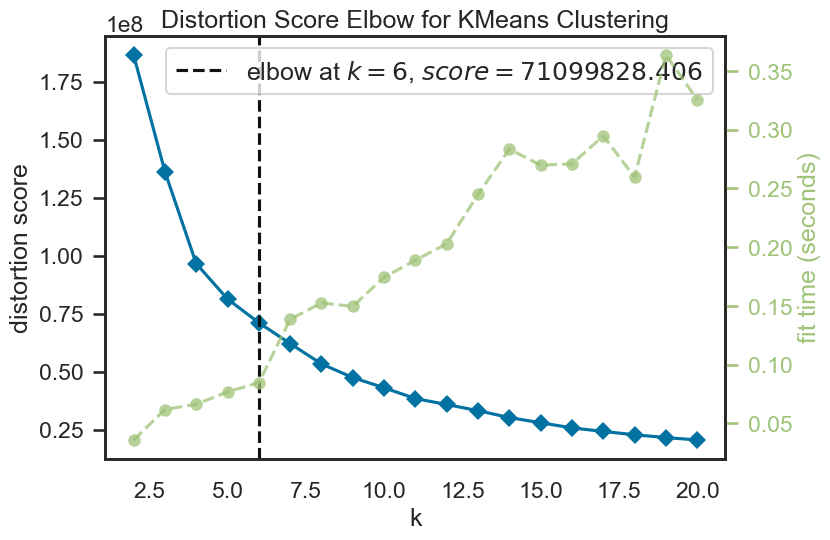

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model_pca= KMeans()
visualizer_pca= KElbowVisualizer(model_pca, k=(2, 21))

visualizer_pca.fit(pca_df_new)
visualizer_pca.show()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=20), k=(2, 21))

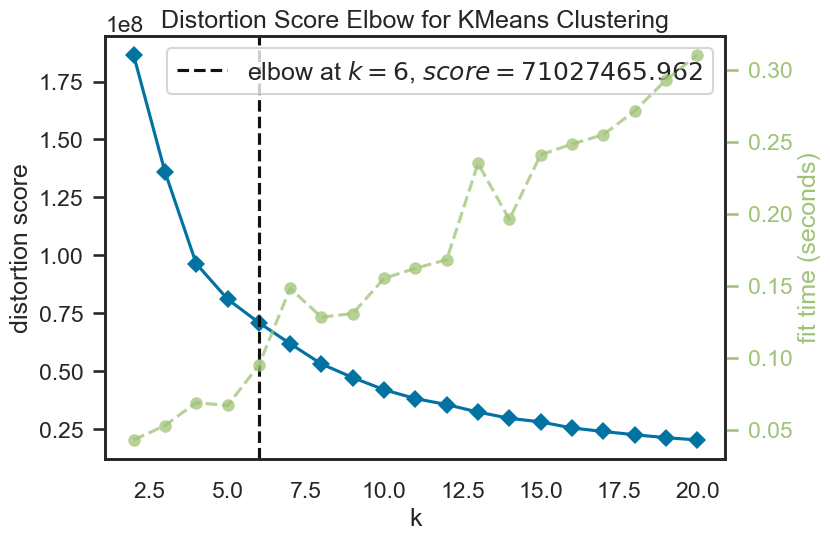

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model_pca= KMeans()
visualizer_pca= KElbowVisualizer(model_pca, k=(2, 21))

visualizer_pca.fit(X_pca_new)
visualizer_pca.show()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=20), k=(2, 21))

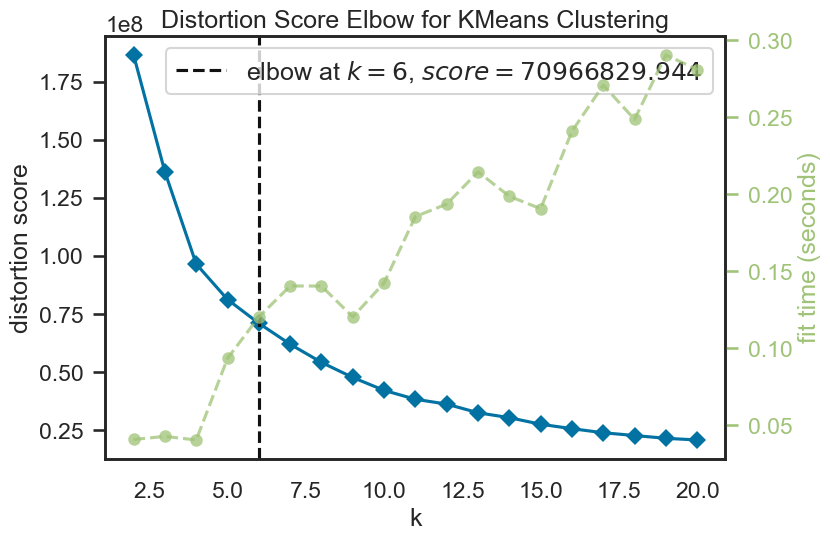

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model_pca= KMeans()
visualizer_pca= KElbowVisualizer(model_pca, k=(2, 21))

visualizer_pca.fit(X_pca_new)
visualizer_pca.show()

No. Clusters: 2, Silhouette Score: 0.42, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.48, Change from Previous Cluster: 0.06
No. Clusters: 4, Silhouette Score: 0.512, Change from Previous Cluster: 0.032
No. Clusters: 5, Silhouette Score: 0.486, Change from Previous Cluster: -0.026
No. Clusters: 6, Silhouette Score: 0.48, Change from Previous Cluster: -0.006
No. Clusters: 7, Silhouette Score: 0.443, Change from Previous Cluster: -0.037
No. Clusters: 8, Silhouette Score: 0.443, Change from Previous Cluster: 0.0
No. Clusters: 9, Silhouette Score: 0.431, Change from Previous Cluster: -0.012


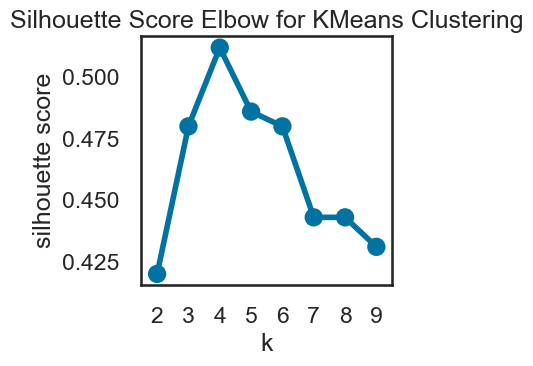

In [ ]:
#Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(X_pca_new, 2, 10)

No. Clusters: 2, Silhouette Score: 0.42, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.48, Change from Previous Cluster: 0.06
No. Clusters: 4, Silhouette Score: 0.512, Change from Previous Cluster: 0.032
No. Clusters: 5, Silhouette Score: 0.486, Change from Previous Cluster: -0.026
No. Clusters: 6, Silhouette Score: 0.487, Change from Previous Cluster: 0.001
No. Clusters: 7, Silhouette Score: 0.441, Change from Previous Cluster: -0.046
No. Clusters: 8, Silhouette Score: 0.399, Change from Previous Cluster: -0.042
No. Clusters: 9, Silhouette Score: 0.431, Change from Previous Cluster: 0.032


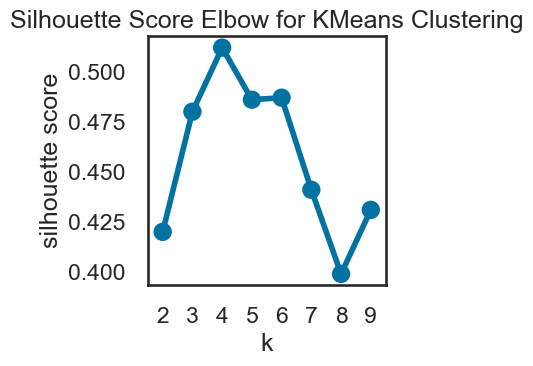

In [ ]:
#Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(X_pca_new, 2, 10)

In [ ]:
#refit the model with the optimal number of cluster
# Create a KMeans object with the desired number of clusters
model_pca_r = KMeans(n_clusters=4)

# Fit the KMeans model to the data
model_pca_r.fit(X_pca_new)

# Predict the cluster of each row
labels_pca_r = model_pca_r.predict(X_pca_new)

# Get the centroids of each cluster
centroids_r = model_pca_r.cluster_centers_
labels_pca_r
centroids_r

KMeans(n_clusters=4)

array([3, 1, 0, ..., 3, 1, 3])

array([[ 7.42612098e+01, -4.10041714e+01, -1.37204392e+02,
        -4.66335583e-01],
       [ 1.48842516e+02, -1.27765290e+01,  7.68986133e+01,
         5.69457358e-01],
       [ 1.82107450e+01,  2.74287643e+02, -2.60811742e+01,
        -1.16962046e+00],
       [-8.57762853e+01, -1.05031318e+01,  1.13178286e+01,
         2.05165064e-02]])

In [2]:
# fig = px.scatter(x=X_pca_new[:, 0], y=X_pca_new[:, 1], color=labels_pca_r)
# fig.update_layout(
#     title="PCA visualization of our dataset",
#     xaxis_title="First Principal Component",
#     yaxis_title="Second Principal Component",
# )
# fig.show()

In [ ]:
from sklearn.manifold import TSNE

tsne_pca_4= TSNE(n_components=2, random_state=42)
pca_4 = tsne_pca_4.fit_transform(X_pca_new)
tsne_pca_4.kl_divergence_

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



0.5745353698730469

In [1]:
# fig = px.scatter(x=pca_4[:, 0], y=pca_4[:, 1], color=labels_pca_r)
# fig.update_layout(
#     title="PCA visualization of our dataset",
#     xaxis_title="First Principal Component",
#     yaxis_title="Second Principal Component",
# )
# fig.show()

---
<h1><font color = blue>Question 4</font></h1>

---

Based on your results from Q3 report the `statistics of loyalty scores` for each cluster of users. Report your findings

### Statisticalof loyalty scores for each cluster of users.  when using all the data `First try`

In [ ]:
labels_pca_r= pd.DataFrame(labels_pca,columns=['clusters of pca'])

In [ ]:
score_col.shape
labels_pca_r.shape

(430287,)

(430287, 1)

In [ ]:
df_ = pd.concat([score_col, labels_pca_r], axis=1)

In [ ]:
df_

,score,clusters of pca
0,4.806,3
1,0.779,3
2,5.708,3
3,-0.457,3
4,1.540,3
...,...,...
430282,0.699,1
430283,2.293,1
430284,-1.891,1
430285,0.000,1


In [ ]:
df_.isnull().values.sum()

0

In [ ]:
statistical_report_pca_ = df_.groupby('clusters of pca')['score'].agg(['sum', 'mean', 'max', 'min', 'std'])

In [ ]:
statistical_report_pca_

,sum,mean,max,min,std
clusters of pca,,,,,
0,-44541.637,-0.409,17.965,-33.219,3.538
1,-54402.572,-0.545,15.295,-33.219,4.146
2,-23023.904,-0.316,13.602,-33.219,3.277
3,-24239.398,-0.486,15.011,-33.219,3.414
4,-4669.819,-0.346,10.959,-33.219,3.593
5,-2.620,-0.238,2.024,-3.432,1.518
6,-30516.534,-0.358,15.994,-33.219,3.671


### Statisticalof loyalty scores for each cluster of users. when using Sample of data `Seond try`

In [ ]:
labels_pca_r= pd.DataFrame(labels_pca,columns=['clusters of pca'])

In [ ]:
score_col.shape
labels_pca_r.shape

(430287,)

(10000, 1)

In [ ]:
df2 = pd.concat([score_col, labels_pca], axis=1)

In [ ]:
df2

,score,clusters
0,4.806,0
1,0.779,0
2,5.708,0
3,-0.457,0
4,1.540,0
...,...,...
430282,0.699,2
430283,2.293,0
430284,-1.891,0
430285,0.000,2


In [ ]:
df2.isnull().values.sum()

420287

In [ ]:
df2=df2.dropna()
df2

,score,clusters of pca
0,4.806,0.000
1,0.779,2.000
2,5.708,1.000
3,-0.457,0.000
4,1.540,0.000
...,...,...
9995,-0.433,0.000
9996,-1.365,0.000
9997,0.279,0.000
9998,-3.320,2.000


In [ ]:
statistical_report_pca_2 = df2.groupby('clusters of pca')['score'].agg(['sum', 'mean', 'max', 'min', 'std'])

In [ ]:
statistical_report_pca_2

,sum,mean,max,min,std
clusters of pca,,,,,
0.000,-2336.778,-0.424,10.450,-33.219,3.719
1.000,-539.861,-0.331,8.222,-33.219,3.618
2.000,-752.969,-0.328,7.734,-33.219,3.350
3.000,-230.520,-0.411,5.821,-33.219,3.768


---
<h1><font color = blue>Question 5</font></h1>

---

 Use frequent pattern mining to find frequently co-occurring transaction types. Report your findings and justify how you pick the min support threshold.

In [ ]:
total_data
total_data.info()

,merchant_id,merchant_group_id,merchant_category_id_x,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,feature_1,feature_2,feature_3,score,purchase_date,purchase_amount,month_lag,authorized_flag,city_id_y,merchant_category_id_y
0,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,1,2,0,4.806,11,-0.083,-5.455,Y,-1,690
1,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,1,0,0.779,2,0.016,1.500,Y,-1,690
2,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,3,0,5.708,30,0.323,-1.367,Y,-1,690
3,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,1,0,-0.457,6,-0.279,-4.667,Y,-1,690
4,M_ID_c9855bf3e3,321,690,1,-0.057,-0.057,Y,E,E,1.000,...,2,2,0,1.540,2,-0.017,2.000,Y,-1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430282,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,2,0,0.699,152,-0.675,-2.487,Y,69,560
430283,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,3,0,2.293,22,-0.565,-2.182,Y,69,278
430284,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,5,1,1,-1.891,1,-0.678,2.000,Y,69,606
430285,M_ID_cd2c0b07e9,35,606,17,-0.057,-0.057,N,A,A,0.900,...,2,1,0,0.000,33,-0.718,-5.485,Y,69,606


<class 'pandas.core.frame.DataFrame'>
Int64Index: 430287 entries, 0 to 430286
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  430287 non-null  object 
 1   merchant_group_id            430287 non-null  int64  
 2   merchant_category_id_x       430287 non-null  int64  
 3   subsector_id                 430287 non-null  int64  
 4   numerical_1                  430287 non-null  float64
 5   numerical_2                  430287 non-null  float64
 6   category_1                   430287 non-null  object 
 7   most_recent_sales_range      430287 non-null  object 
 8   most_recent_purchases_range  430287 non-null  object 
 9   avg_sales_lag3               430287 non-null  float64
 10  avg_purchases_lag3           430287 non-null  float64
 11  active_months_lag3           430287 non-null  int64  
 12  avg_sales_lag6               430287 non-null  float64
 13 

In [ ]:
# check categorical and ordinal features
category_data = total_data.select_dtypes(include=['object', 'category'])
for col in total_data.columns:
    print(total_data[col].value_counts()) # to print count of every category

M_ID_00a6ca8a8a    95286
M_ID_9139332ccc     7571
M_ID_e5374dabc0     5371
M_ID_fc7d7969c3     3997
M_ID_50f575c681     2083
                   ...  
M_ID_61157443c9        1
M_ID_2f4ed73041        1
M_ID_3e40f7b03a        1
M_ID_6d75a3053f        1
M_ID_1a5278a627        1
Name: merchant_id, Length: 85262, dtype: int64
35        191753
1145        6664
104706      3997
321         2644
176         2336
           ...  
111890         1
108011         1
77069          1
63378          1
100166         1
Name: merchant_group_id, Length: 47346, dtype: int64
511    105736
705     74803
307     36710
80      18211
278     17285
        ...  
334         1
546         1
83          1
261         1
249         1
Name: merchant_category_id_x, Length: 279, dtype: int64
7     110762
33     75291
37     38639
19     37865
34     26829
27     20628
16     17155
29     16780
8      11129
21      9864
1       9072
15      8960
18      5304
22      4987
20      4129
36      4121
25      3377
30     

In [ ]:
data=data.drop(['card_id','merchant_id','purchase_date','first_active_month'], axis=1)

In [ ]:
# Select the columns to copy.
columns = ['most_recent_sales_range','category_1','most_recent_sales_range',
           'most_recent_purchases_range','authorized_flag','card_id','category_4']

# Make a copy of the columns.
dataframe_ = total_data[columns].copy()


In [ ]:
dataframe_

,most_recent_sales_range,category_1,most_recent_sales_range,most_recent_purchases_range,authorized_flag,card_id,category_4
0,E,Y,E,E,Y,C_ID_9c5a4d284f,Y
1,E,Y,E,E,Y,C_ID_921ea6c947,Y
2,E,Y,E,E,Y,C_ID_2ad1c2d18c,Y
3,E,Y,E,E,Y,C_ID_f4fee1e5d2,Y
4,E,Y,E,E,Y,C_ID_3bec7d24df,Y
...,...,...,...,...,...,...,...
430282,A,N,A,A,Y,C_ID_c0d08be256,Y
430283,A,N,A,A,Y,C_ID_02130c40ff,Y
430284,A,N,A,A,Y,C_ID_2fb01f8cf2,Y
430285,A,N,A,A,Y,C_ID_eb5ecaf57e,Y


In [ ]:
# Randomly sample 100,00 rows from the datase
new_dataframe= dataframe_.sample(n=10000, random_state=42)

In [ ]:
one_hot_encoded_ = pd.get_dummies(new_dataframe)

In [ ]:
one_hot_encoded_

,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,most_recent_sales_range_D,most_recent_sales_range_E,category_1_N,category_1_Y,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,...,card_id_C_ID_ffdf8608e4,card_id_C_ID_ffe04f03a1,card_id_C_ID_ffe16cfd99,card_id_C_ID_ffe80c5734,card_id_C_ID_ffea783298,card_id_C_ID_ffeaa35463,card_id_C_ID_fff690bccc,card_id_C_ID_ffff828181,category_4_N,category_4_Y
383500,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
180638,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20035,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
297562,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
26283,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101672,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
80769,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
173000,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
137020,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
!pip install mlxtend
!pip install category_encoders

In [ ]:
# Import necessary libraries
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import category_encoders

# Apply the apriori algorithm to find frequent itemsets
# Use a min_support value of 0.6 (this value is chosen based on the knowledge about your dataset)
frequent_itemsets = apriori(one_hot_encoded_, min_support=0.4, use_colnames=True)

print(frequent_itemsets)

C:\Users\Lap-5\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



   support                           itemsets
0    0.659                     (category_1_N)
1    0.992                (authorized_flag_Y)
2    0.400                     (category_4_N)
3    0.600                     (category_4_Y)
4    0.656  (authorized_flag_Y, category_1_N)
5    0.400       (category_1_N, category_4_N)
6    0.594  (authorized_flag_Y, category_4_Y)


---
<h1><font color = blue>Question 6</font></h1>

---

Redo Q5 by splitting users based on their loyalty scores.
The goal is to explore if different frequent patterns exist in users with
high/low loyalty scores.


> Now, I will add score column to dataframe data to can calculate mean of score and spilt the data depend on it.

In [ ]:
# Concatenate the DataFrames.
df_concat = pd.concat([dataframe_,score_col], axis=1)

In [ ]:
df_concat

,most_recent_sales_range,category_1,most_recent_sales_range,most_recent_purchases_range,authorized_flag,card_id,category_4,score
0,E,Y,E,E,Y,C_ID_9c5a4d284f,Y,4.806
1,E,Y,E,E,Y,C_ID_921ea6c947,Y,0.779
2,E,Y,E,E,Y,C_ID_2ad1c2d18c,Y,5.708
3,E,Y,E,E,Y,C_ID_f4fee1e5d2,Y,-0.457
4,E,Y,E,E,Y,C_ID_3bec7d24df,Y,1.540
...,...,...,...,...,...,...,...,...
430282,A,N,A,A,Y,C_ID_c0d08be256,Y,0.699
430283,A,N,A,A,Y,C_ID_02130c40ff,Y,2.293
430284,A,N,A,A,Y,C_ID_2fb01f8cf2,Y,-1.891
430285,A,N,A,A,Y,C_ID_eb5ecaf57e,Y,0.000


In [ ]:
mean_score=score_col.mean()

In [ ]:
mean_score

-0.4215709127922542

In [ ]:
df1 = df_concat[df_concat['score'] < mean_score].copy()
df2 = df_concat[df_concat['score'] >= mean_score].copy()

In [ ]:
df1
df2

,most_recent_sales_range,category_1,most_recent_sales_range,most_recent_purchases_range,authorized_flag,card_id,category_4,score
3,E,Y,E,E,Y,C_ID_f4fee1e5d2,Y,-0.457
7,E,Y,E,E,Y,C_ID_eba5d9f810,Y,-0.639
9,E,Y,E,E,Y,C_ID_39fd4de9d5,Y,-3.082
10,E,Y,E,E,Y,C_ID_af53bfd9b6,Y,-0.438
12,E,Y,E,E,Y,C_ID_33d8ae904d,Y,-2.236
...,...,...,...,...,...,...,...,...
430275,A,N,A,A,Y,C_ID_8ddf9695e3,Y,-0.505
430276,A,N,A,A,Y,C_ID_e0cde6d7bb,Y,-1.429
430278,A,N,A,A,Y,C_ID_f5152857d8,Y,-0.882
430284,A,N,A,A,Y,C_ID_2fb01f8cf2,Y,-1.891


,most_recent_sales_range,category_1,most_recent_sales_range,most_recent_purchases_range,authorized_flag,card_id,category_4,score
0,E,Y,E,E,Y,C_ID_9c5a4d284f,Y,4.806
1,E,Y,E,E,Y,C_ID_921ea6c947,Y,0.779
2,E,Y,E,E,Y,C_ID_2ad1c2d18c,Y,5.708
4,E,Y,E,E,Y,C_ID_3bec7d24df,Y,1.540
5,E,Y,E,E,Y,C_ID_e1fcc0b51e,Y,-0.299
...,...,...,...,...,...,...,...,...
430280,A,N,A,A,Y,C_ID_bc51d8b438,Y,0.895
430281,A,N,A,A,Y,C_ID_cf56bf933c,Y,0.097
430282,A,N,A,A,Y,C_ID_c0d08be256,Y,0.699
430283,A,N,A,A,Y,C_ID_02130c40ff,Y,2.293


> Let's try to handle the first datafrme `df1`

In [ ]:
df1=df1.drop(['score'],axis=1)

In [ ]:
df1

,most_recent_sales_range,category_1,most_recent_sales_range,most_recent_purchases_range,authorized_flag,card_id,category_4
3,E,Y,E,E,Y,C_ID_f4fee1e5d2,Y
7,E,Y,E,E,Y,C_ID_eba5d9f810,Y
9,E,Y,E,E,Y,C_ID_39fd4de9d5,Y
10,E,Y,E,E,Y,C_ID_af53bfd9b6,Y
12,E,Y,E,E,Y,C_ID_33d8ae904d,Y
...,...,...,...,...,...,...,...
430275,A,N,A,A,Y,C_ID_8ddf9695e3,Y
430276,A,N,A,A,Y,C_ID_e0cde6d7bb,Y
430278,A,N,A,A,Y,C_ID_f5152857d8,Y
430284,A,N,A,A,Y,C_ID_2fb01f8cf2,Y


In [ ]:
one_hot_encoded_df1 = pd.get_dummies(df1)

MemoryError: Unable to allocate 11.1 GiB for an array with shape (73865, 161858) and data type uint8

> Because this error I will take sample from dataframe

In [ ]:
# Randomly sample 100,00 rows from the datase
new_df1= df1.sample(n=10000, random_state=42)

In [ ]:
one_hot_encoded_df1 = pd.get_dummies(new_df1)

In [ ]:
one_hot_encoded_df1

,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,most_recent_sales_range_D,most_recent_sales_range_E,category_1_N,category_1_Y,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,...,card_id_C_ID_ffd2ccf5ae,card_id_C_ID_ffdaef1fae,card_id_C_ID_ffe670105f,card_id_C_ID_ffe688fd68,card_id_C_ID_ffe703f745,card_id_C_ID_fff38f8134,card_id_C_ID_fff4ec311a,card_id_C_ID_fff82c2722,category_4_N,category_4_Y
225433,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
175230,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
94764,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
90047,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
222445,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251751,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
254913,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
376716,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
265821,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Apply the apriori algorithm to find frequent itemsets
# Use a min_support value of 0.6 (this value is chosen based on the knowledge about your dataset)
frequent_itemsets = apriori(one_hot_encoded_df1, min_support=0.4, use_colnames=True)

print(frequent_itemsets)

C:\Users\Lap-5\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



   support                           itemsets
0    0.657                     (category_1_N)
1    0.993                (authorized_flag_Y)
2    0.401                     (category_4_N)
3    0.599                     (category_4_Y)
4    0.655  (authorized_flag_Y, category_1_N)
5    0.401       (category_1_N, category_4_N)
6    0.594  (authorized_flag_Y, category_4_Y)


> Let's try to handle the first datafrme `df2`

In [ ]:
df2=df2.drop(['score'],axis=1)

In [ ]:
df2

,most_recent_sales_range,category_1,most_recent_sales_range,most_recent_purchases_range,authorized_flag,card_id,category_4
0,E,Y,E,E,Y,C_ID_9c5a4d284f,Y
1,E,Y,E,E,Y,C_ID_921ea6c947,Y
2,E,Y,E,E,Y,C_ID_2ad1c2d18c,Y
4,E,Y,E,E,Y,C_ID_3bec7d24df,Y
5,E,Y,E,E,Y,C_ID_e1fcc0b51e,Y
...,...,...,...,...,...,...,...
430280,A,N,A,A,Y,C_ID_bc51d8b438,Y
430281,A,N,A,A,Y,C_ID_cf56bf933c,Y
430282,A,N,A,A,Y,C_ID_c0d08be256,Y
430283,A,N,A,A,Y,C_ID_02130c40ff,Y


In [ ]:
# Randomly sample 100,00 rows from the datase
new_df2= df2.sample(n=10000, random_state=42)

In [ ]:
one_hot_encoded_df2 = pd.get_dummies(new_df2)

In [ ]:
one_hot_encoded_df2

,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,most_recent_sales_range_D,most_recent_sales_range_E,category_1_N,category_1_Y,most_recent_sales_range_A,most_recent_sales_range_B,most_recent_sales_range_C,...,card_id_C_ID_ffe98a4674,card_id_C_ID_ffec95782a,card_id_C_ID_ffef6a5157,card_id_C_ID_fff33122b1,card_id_C_ID_fff845b82f,card_id_C_ID_fffba72dc5,card_id_C_ID_fffd24dcf3,card_id_C_ID_ffff579d3a,category_4_N,category_4_Y
157684,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64183,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
174662,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
231319,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
51509,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144080,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
319547,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
223284,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
410802,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Apply the apriori algorithm to find frequent itemsets
# Use a min_support value of 0.6 (this value is chosen based on the knowledge about your dataset)
frequent_itemsets = apriori(one_hot_encoded_df2, min_support=0.4, use_colnames=True)

print(frequent_itemsets)

C:\Users\Lap-5\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



   support                                         itemsets
0    0.657                                   (category_1_N)
1    0.993                              (authorized_flag_Y)
2    0.409                                   (category_4_N)
3    0.591                                   (category_4_Y)
4    0.655                (authorized_flag_Y, category_1_N)
5    0.409                     (category_1_N, category_4_N)
6    0.407                (authorized_flag_Y, category_4_N)
7    0.586                (authorized_flag_Y, category_4_Y)
8    0.407  (authorized_flag_Y, category_1_N, category_4_N)
